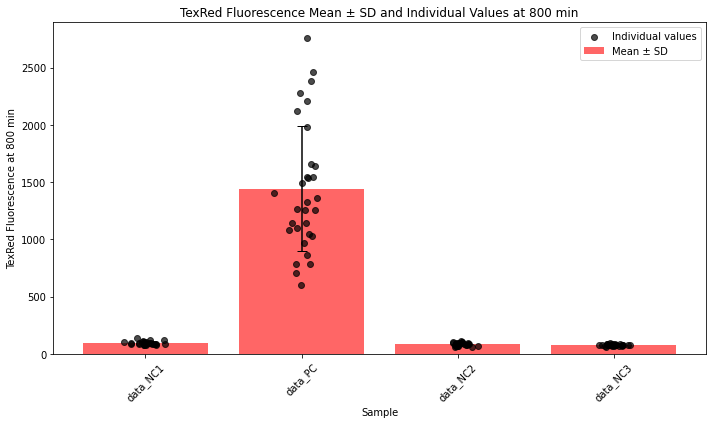

In [5]:
#fig 3D


# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

'''
T7mC-S*		PC
T7mC-WT		NC1
T7WT-WT		NC2
T7WT-S*		NC3
'''

# Define file names and the time point of interest
file_names = ["data_NC1.xlsx", "data_PC.xlsx", "data_NC2.xlsx", "data_NC3.xlsx"]
time_point = 800  # time point in minutes
fluorophore = 'TexRed'  # Change to 'TexRed' or 'GFP' as needed

# Define a function to extract data at the specified time point
def extract_data_at_time(file_name, time_point, fluorophore='TexRed'):
    # Load the Excel file
    xls = pd.ExcelFile(file_name)
    
    # List to hold fluorescence data at the specified time point
    fluorescence_values = []
    
    # Loop over each sheet
    for sheet_name in xls.sheet_names:
        # Read the sheet into a DataFrame
        df = xls.parse(sheet_name)
        
        # Filter the row at the specified time point
        row = df[df['Time [min]'] == time_point]
        
        # If the row exists at this time point, extract fluorescence data for the selected fluorophore
        if not row.empty:
            fluor_columns = [col for col in df.columns if fluorophore in col]
            fluorescence_values.extend(row[fluor_columns].values.flatten())  # Flatten to get values in a single list
            
    return fluorescence_values


# Initialize lists to store data for each file
means = []
std_devs = []
all_values = []

# Loop over each file and calculate mean and std deviation at the time point
for file_name in file_names:
    # Extract the fluorescence data at the specified time point
    fluorescence_values = extract_data_at_time(file_name, time_point, fluorophore)
    
    # Calculate mean and standard deviation
    mean_fluor = np.mean(fluorescence_values)
    std_fluor = np.std(fluorescence_values)
    
    # Store the results
    means.append(mean_fluor)
    std_devs.append(std_fluor)
    all_values.append(fluorescence_values)
    

# Plotting
plt.figure(figsize=(10, 6))

# Define positions for bars and scatter points
x_positions = np.arange(len(file_names))

# Create bar plot for the means with standard deviation error bars
plt.bar(x_positions, means, yerr=std_devs, capsize=5, alpha=0.6, label='Mean ± SD', color='red')

# Add scatter points for all individual values
for i, values in enumerate(all_values):
    # Slightly jitter the x positions to avoid overlap
    jittered_x = np.full(len(values), x_positions[i]) + np.random.normal(0, 0.05, len(values))
    plt.scatter(jittered_x, values, color='black', edgecolor='black', alpha=0.7, zorder=2, label='Individual values' if i == 0 else "")

# Plot details
plt.xlabel('Sample')
plt.ylabel(f'{fluorophore} Fluorescence at {time_point} min')
plt.title(f'{fluorophore} Fluorescence Mean ± SD and Individual Values at {time_point} min')
plt.xticks(x_positions, [file_name.replace('.xlsx', '') for file_name in file_names], rotation=45)
plt.legend()
plt.tight_layout()
#plt.savefig("Fig 3D.svg", format='svg')
plt.show()

N=8 vesicles in sheet s1.
N=10 vesicles in sheet s2.
N=10 vesicles in sheet s3.


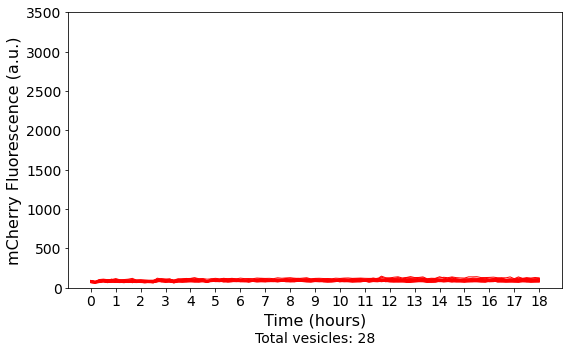

N=11 vesicles in sheet s4.
N=10 vesicles in sheet s5.
N=10 vesicles in sheet s6.


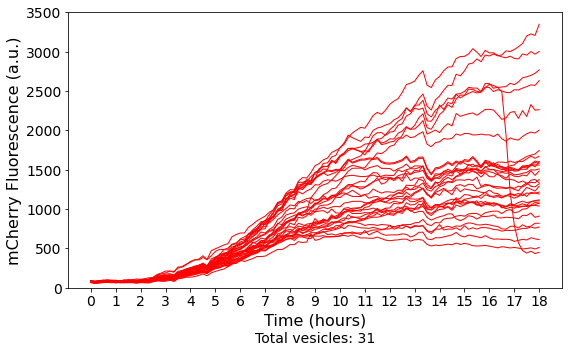

N=10 vesicles in sheet s7.
N=8 vesicles in sheet s8.
N=9 vesicles in sheet s9.


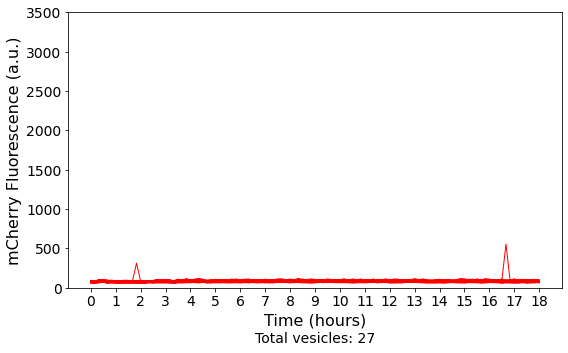

N=10 vesicles in sheet s10.
N=8 vesicles in sheet s11.
N=10 vesicles in sheet s12.


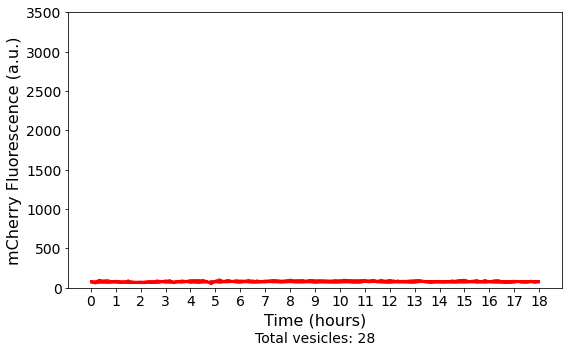

In [6]:
#fig S17

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

'''
T7mC-S*		PC
T7mC-WT		NC1
T7WT-WT		NC2
T7WT-S*		NC3
'''

# List of Excel files
file_names = ["data_NC1.xlsx", "data_PC.xlsx", "data_NC2.xlsx", "data_NC3.xlsx"]

# Function to load and process data
def load_data(file_name, fluorophore='TexRed'):
    xls = pd.ExcelFile(file_name)
    data_dict = {}

    for sheet_name in xls.sheet_names:
        df = xls.parse(sheet_name)

        # Remove timepoint 65 (in minutes, equivalent to 65 * 10 = 650 minutes)
        df = df[df['Time [min]'] != 640]

        # Extract time and fluorophore columns
        time = df['Time [min]']
        fluor_columns = [col for col in df.columns if fluorophore in col]
        fluorescence_data = df[fluor_columns]

        data_dict[sheet_name] = (time, fluorescence_data)

    return data_dict

# Function to plot fluorescence data
def plot_fluorescence(data_dict, file_name, fluorophore='TexRed'):
    plt.figure(figsize=(8, 5))

    total_vesicles = 0

    for sheet_name, (time, fluorescence_data) in data_dict.items():
        # Count and accumulate the number of vesicles
        vesicle_count = fluorescence_data.shape[1]
        total_vesicles += vesicle_count

        # Print the number of vesicles (data points) for each replicate (sheet)
        print(f'N={vesicle_count} vesicles in sheet {sheet_name}.')

        # Plot each vesicle's fluorescence
        for col in fluorescence_data.columns:
            plt.plot(time / 60, fluorescence_data[col], color='red', linewidth=1)  # Convert time to hours

    # Plot customization
    plt.xlabel('Time (hours)', fontsize=16)
    plt.ylabel('mCherry Fluorescence (a.u.)', fontsize=16)
    plt.xticks(np.arange(0, 19, 1), fontsize=14)  # Time in hours, one tick every hour up to 16 hours
    plt.yticks(fontsize=14)
    plt.ylim(0, 3500)

    # Display the vesicle count below the plot
    plt.text(0.5, -0.2, f'Total vesicles: {total_vesicles}', ha='center', fontsize=14, transform=plt.gca().transAxes)

    plt.tight_layout()
    #plt.savefig(f'{file_name} kinetics cascade.svg', format='svg')
    plt.show()

# Process and plot data for each file
for file_name in file_names:
    data_dict = load_data(file_name, fluorophore='TexRed')
    plot_fluorescence(data_dict, file_name, fluorophore='TexRed')
